# Tuning Neural Networks with Normalization - Lab 

## Introduction

In this lab you'll build a neural network to perform a regression task.

It is worth noting that getting regression to work with neural networks can be comparatively difficult because the output is unbounded ($\hat y$ can technically range from $-\infty$ to $+\infty$), and the models are especially prone to exploding gradients. This issue makes a regression exercise the perfect learning case for tinkering with normalization and optimization strategies to ensure proper convergence!

## Objectives

In this lab you will: 

- Fit a neural network to normalized data 
- Implement and observe the impact of various initialization techniques 
- Implement and observe the impact of various optimization techniques 

## Load the data 

First, run the following cell to import all the neccessary libraries and classes you will need in this lab. 

In [1]:
# Necessary libraries and classes
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import initializers
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In this lab, you'll be working with the housing prices data you saw in an earlier section. However, we did a lot of preprocessing for you so you can focus on normalizing numeric features and building neural network models! The following preprocessing steps were taken (all the code can be found in the `data_preprocessing.ipynb` notebook in this repository): 

- The data was split into the training, validate, and test sets 
- All the missing values in numeric columns were replaced by the median of those columns 
- All the missing values in catetgorical columns were replaced with the word 'missing' 
- All the categorical columns were one-hot encoded 

Run the following cells to import the train, validate, and test sets:  

In [2]:
# Load all numeric features
X_train_numeric = pd.read_csv('data/X_train_numeric.csv')
X_val_numeric = pd.read_csv('data/X_val_numeric.csv')
X_test_numeric = pd.read_csv('data/X_test_numeric.csv')

# Load all categorical features
X_train_cat = pd.read_csv('data/X_train_cat.csv')
X_val_cat = pd.read_csv('data/X_val_cat.csv')
X_test_cat = pd.read_csv('data/X_test_cat.csv')

# Load all targets
y_train = pd.read_csv('data/y_train.csv')
y_val = pd.read_csv('data/y_val.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
# Combine all features
X_train = pd.concat([X_train_numeric, X_train_cat], axis=1)
X_val = pd.concat([X_val_numeric, X_val_cat], axis=1)
X_test = pd.concat([X_test_numeric, X_test_cat], axis=1)

# Number of features
n_features = X_train.shape[1]

As a refresher, preview the training data: 

In [4]:
# Preview the data
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,69.0,21453.0,6.0,5.0,1969.0,1969.0,0.0,938.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60.0,79.0,12420.0,7.0,5.0,2001.0,2001.0,0.0,666.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.0,75.0,9742.0,8.0,5.0,2002.0,2002.0,281.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,120.0,39.0,5389.0,8.0,5.0,1995.0,1996.0,0.0,1180.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,85.0,11003.0,10.0,5.0,2008.0,2008.0,160.0,765.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Build a Baseline Model

Building a naive baseline model to compare performance against is a helpful reference point. From there, you can then observe the impact of various tunning procedures which will iteratively improve your model. So, let's do just that! 

In the cell below: 

- Add an input layer with `n_features` units 
- Add two hidden layers, one with 100 and the other with 50 units (make sure you use the `'relu'` activation function) 
- Add an output layer with 1 unit and `'linear'` activation 
- Compile and fit the model 

In [9]:
np.random.seed(123)
baseline_model = Sequential()

# Hidden layer with 100 units
baseline_model.add(layers.Dense(100, activation='relu', input_shape=(296,)))

# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='relu'))

# Output layer
baseline_model.add(layers.Dense(1, activation='linear'))

# Compile the model
baseline_model.compile(optimizer='SGD', 
                       loss='mse', 
                       metrics=['mse'])

# Train the model
baseline_model.fit(X_train, 
                   y_train, 
                   batch_size=32, 
                   epochs=150, 
                   validation_data=(X_val, y_val))

Epoch 1/150
33/33 [==============================] - 0s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/150
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/150
33/33 [=============================

33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 71/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 72/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 73/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 74/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 75/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 76/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 77/150
33/33 [==============================] -

33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 138/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 139/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 140/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 141/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 142/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 143/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 144/150
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 145/150
33/33 [=========================

> _**Notice this extremely problematic behavior: all the values for training and validation loss are "nan". This indicates that the algorithm did not converge. The first solution to this is to normalize the input. From there, if convergence is not achieved, normalizing the output may also be required.**_ 

## Normalize the Input Data 

It's now time to normalize the input data. In the cell below: 

- Assign the column names of all numeric columns to `numeric_columns` 
- Instantiate a `StandardScaler` 
- Fit and transform `X_train_numeric`. Make sure you convert the result into a DataFrame (use `numeric_columns` as the column names) 
- Transform validate and test sets (`X_val_numeric` and `X_test_numeric`), and convert these results into DataFrames as well 
- Use the provided to combine the scaled numerical and categorical features 

In [35]:
# Numeric column names
numeric_columns = X_test_numeric.columns 

In [36]:
# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform train data
X_train_scaled = pd.DataFrame(ss_X.fit_transform(X_train_numeric),
                              columns=numeric_columns)

# Transform validate and test data
X_val_scaled = pd.DataFrame(ss_X.transform(X_val_numeric),
                              columns=numeric_columns)
X_test_scaled = pd.DataFrame(ss_X.transform(X_test_numeric),
                              columns=numeric_columns)

# Combine the scaled numerical features and categorical features
X_train = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_val = pd.concat([X_val_scaled, X_val_cat], axis=1)
X_test = pd.concat([X_test_scaled, X_test_cat], axis=1)

Now run the following cell to compile a neural network model (with the same architecture as before): 

In [44]:
X_train.shape

(1051, 296)

In [45]:
n_features

296

In [47]:
# Model with all normalized inputs
np.random.seed(123)
normalized_input_model = Sequential()
normalized_input_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
normalized_input_model.add(layers.Dense(50, activation='relu'))
normalized_input_model.add(layers.Dense(1, activation='linear'))

# Compile the model
normalized_input_model.compile(optimizer='SGD', 
                               loss='mse', 
                               metrics=['mse'])

In the cell below: 
- Train the `normalized_input_model` on normalized input (`X_train`) and output (`y_train`) 
- Set a batch size of 32 and train for 150 epochs 
- Specify the `validation_data` argument as `(X_val, y_val)` 

In [84]:
# Train the model 
normalized_val = normalized_input_model.fit(X_train, y_train,
                          batch_size=32, epochs=150,
                          validation_data = (X_val, y_val))

Epoch 1/150
33/33 [==============================] - 0s 2ms/step - loss: 6179433984.0000 - mse: 6179433984.0000 - val_loss: 5272705024.0000 - val_mse: 5272705024.0000
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 6179456000.0000 - mse: 6179456000.0000 - val_loss: 5267808256.0000 - val_mse: 5267808256.0000
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 6178725376.0000 - mse: 6178725376.0000 - val_loss: 5267374080.0000 - val_mse: 5267374080.0000
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 6179058688.0000 - mse: 6179058688.0000 - val_loss: 5267227136.0000 - val_mse: 5267227136.0000
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 6178145792.0000 - mse: 6178145792.0000 - val_loss: 5261344768.0000 - val_mse: 5261344768.0000
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 6179017728.0000 - mse: 6179017728.0000 - val_loss: 5268096000.0000 - val_mse: 5268096000.000

Epoch 50/150
33/33 [==============================] - 0s 1ms/step - loss: 6176453632.0000 - mse: 6176453632.0000 - val_loss: 5260632576.0000 - val_mse: 5260632576.0000
Epoch 51/150
33/33 [==============================] - 0s 1ms/step - loss: 6178854400.0000 - mse: 6178854400.0000 - val_loss: 5260834816.0000 - val_mse: 5260834816.0000
Epoch 52/150
33/33 [==============================] - 0s 1ms/step - loss: 6177815040.0000 - mse: 6177815040.0000 - val_loss: 5261245952.0000 - val_mse: 5261245952.0000
Epoch 53/150
33/33 [==============================] - 0s 1ms/step - loss: 6178037760.0000 - mse: 6178037760.0000 - val_loss: 5264544256.0000 - val_mse: 5264544256.0000
Epoch 54/150
33/33 [==============================] - 0s 1ms/step - loss: 6177995264.0000 - mse: 6177995264.0000 - val_loss: 5266788864.0000 - val_mse: 5266788864.0000
Epoch 55/150
33/33 [==============================] - 0s 1ms/step - loss: 6178298880.0000 - mse: 6178298880.0000 - val_loss: 5268889600.0000 - val_mse: 52688896

Epoch 99/150
33/33 [==============================] - 0s 1ms/step - loss: 6179822592.0000 - mse: 6179822592.0000 - val_loss: 5273121280.0000 - val_mse: 5273121280.0000
Epoch 100/150
33/33 [==============================] - 0s 1ms/step - loss: 6178236928.0000 - mse: 6178236928.0000 - val_loss: 5266297344.0000 - val_mse: 5266297344.0000
Epoch 101/150
33/33 [==============================] - 0s 1ms/step - loss: 6177673728.0000 - mse: 6177673728.0000 - val_loss: 5263979520.0000 - val_mse: 5263979520.0000
Epoch 102/150
33/33 [==============================] - 0s 1ms/step - loss: 6180683776.0000 - mse: 6180683776.0000 - val_loss: 5264816128.0000 - val_mse: 5264816128.0000
Epoch 103/150
33/33 [==============================] - 0s 1ms/step - loss: 6177735680.0000 - mse: 6177735680.0000 - val_loss: 5267150336.0000 - val_mse: 5267150336.0000
Epoch 104/150
33/33 [==============================] - 0s 1ms/step - loss: 6178285056.0000 - mse: 6178285056.0000 - val_loss: 5270343680.0000 - val_mse: 527

33/33 [==============================] - 0s 1ms/step - loss: 6179392512.0000 - mse: 6179392512.0000 - val_loss: 5271454208.0000 - val_mse: 5271454208.0000
Epoch 148/150
33/33 [==============================] - 0s 1ms/step - loss: 6179410432.0000 - mse: 6179410432.0000 - val_loss: 5268504064.0000 - val_mse: 5268504064.0000
Epoch 149/150
33/33 [==============================] - 0s 1ms/step - loss: 6179281920.0000 - mse: 6179281920.0000 - val_loss: 5266604544.0000 - val_mse: 5266604544.0000
Epoch 150/150
33/33 [==============================] - 0s 1ms/step - loss: 6177880064.0000 - mse: 6177880064.0000 - val_loss: 5266082304.0000 - val_mse: 5266082304.0000


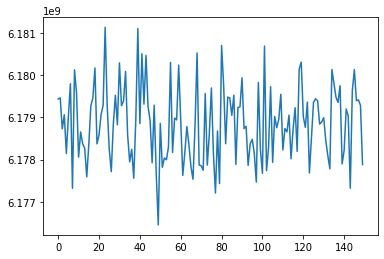

In [89]:
import matplotlib.pyplot as plt
plt.plot(normalized_val.history['mse'])

> _**Note that you still haven't achieved convergence! From here, it's time to normalize the output data.**_

## Normalizing the output

Again, use `StandardScaler()` to: 

- Fit and transform `y_train` 
- Transform `y_val` and `y_test` 

In [49]:
# Instantiate StandardScaler
ss_y = StandardScaler()

# Fit and transform train labels
y_train_scaled = ss_y.fit_transform(y_train)

# Transform validate and test labels
y_val_scaled = ss_y.transform(y_val)
y_test_scaled = ss_y.transform(y_test)

In the cell below: 
- Train the `normalized_model` on normalized input (`X_train`) and output (`y_train_scaled`) 
- Set a batch size of 32 and train for 150 epochs 
- Specify the `validation_data` as `(X_val, y_val_scaled)` 

In [90]:
# Model with all normalized inputs and outputs
np.random.seed(123)
normalized_model = Sequential()
normalized_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
normalized_model.add(layers.Dense(50, activation='relu'))
normalized_model.add(layers.Dense(1, activation='linear'))

# Compile the model
normalized_model.compile(optimizer='SGD', 
                         loss='mse', 
                         metrics=['mse']) 

# Train the model
normalized_val = normalized_model.fit(X_train, y_train_scaled,
                    batch_size=32, epochs=150,
                    validation_data=(X_val, y_val_scaled))

Epoch 1/150
33/33 [==============================] - 0s 3ms/step - loss: 0.5305 - mse: 0.5305 - val_loss: 0.2076 - val_mse: 0.2076
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 0.2372 - mse: 0.2372 - val_loss: 0.1710 - val_mse: 0.1710
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1958 - mse: 0.1958 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1686 - mse: 0.1686 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1632 - val_mse: 0.1632
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1420 - mse: 0.1420 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 0.1293 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 8/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1185 - m

33/33 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.1286 - val_mse: 0.1286
Epoch 64/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.1289 - val_mse: 0.1289
Epoch 65/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 66/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.1350 - val_mse: 0.1350
Epoch 67/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.1321 - val_mse: 0.1321
Epoch 68/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 69/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0226 - mse: 0

Epoch 125/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.1370 - val_mse: 0.1370
Epoch 126/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 127/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.1377 - val_mse: 0.1377
Epoch 128/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 129/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 130/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 131/150
33/33 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.1371 - val_mse: 0.1371
Epoch 132/150
33/33 [==============================] - 0s 1ms/step - 

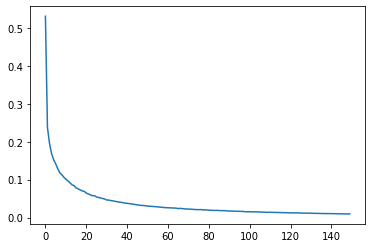

In [91]:
plt.plot(normalized_val.history['mse'])

Nicely done! After normalizing both the input and output, the model finally converged. 

- Evaluate the model (`normalized_model`) on training data (`X_train` and `y_train_scaled`) 

In [51]:
# Evaluate the model on training data
normalized_model.evaluate(X_train, y_train_scaled)

33/33 [==============================] - 0s 485us/step - loss: 0.0067 - mse: 0.0067


[0.006652175914496183, 0.006652175914496183]

- Evaluate the model (`normalized_model`) on validate data (`X_val` and `y_val_scaled`) 

In [52]:
# Evaluate the model on validate data
normalized_model.evaluate(X_val, y_val_scaled)

9/9 [==============================] - 0s 574us/step - loss: 0.1659 - mse: 0.1659


[0.1658889353275299, 0.1658889353275299]

Since the output is normalized, the metric above is not interpretable. To remedy this: 

- Generate predictions on validate data (`X_val`) 
- Transform these predictions back to original scale using `ss_y` 
- Now you can calculate the RMSE in the original units with `y_val` and `y_val_pred` 

In [56]:
# Generate predictions on validate data
y_val_pred_scaled = normalized_model.predict(X_val)

# Transform the predictions back to original scale
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)

# RMSE of validate data
mean_squared_error(y_val, y_val_pred, squared=False)

32006.650282021314

Great! Now that you have a converged model, you can also experiment with alternative optimizers and initialization strategies to see if you can find a better global minimum. (After all, the current models may have converged to a local minimum.) 

## Using Weight Initializers

In this section you will to use alternative initialization and optimization strategies. At the end, you'll then be asked to select the model which you believe performs the best.  

##  He Initialization

In the cell below, sepcify the following in the first hidden layer:  
  - 100 units 
  - `'relu'` activation 
  - `input_shape` 
  - `kernel_initializer='he_normal'`  

In [57]:
np.random.seed(123)
he_model = Sequential()

# Add the first hidden layer
he_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,), kernel_initializer='he_normal'))

# Add another hidden layer
he_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
he_model.add(layers.Dense(1, activation='linear'))

# Compile the model
he_model.compile(optimizer='SGD', 
                 loss='mse', 
                 metrics=['mse'])

# Train the model
he_model.fit(X_train, 
             y_train_scaled, 
             batch_size=32, 
             epochs=150, 
             validation_data=(X_val, y_val_scaled))

Epoch 1/150
33/33 [==============================] - 0s 4ms/step - loss: 0.5173 - mse: 0.5173 - val_loss: 0.2268 - val_mse: 0.2268
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 0.2477 - mse: 0.2477 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 0.2105 - mse: 0.2105 - val_loss: 0.1462 - val_mse: 0.1462
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1695 - mse: 0.1695 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1491 - val_mse: 0.1491
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1361 - mse: 0.1361 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1295 - val_mse: 0.1295
Epoch 8/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1177 - m

33/33 [==============================] - 0s 1ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.1396 - val_mse: 0.1396
Epoch 64/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 65/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.1400 - val_mse: 0.1400
Epoch 66/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 67/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.1397 - val_mse: 0.1397
Epoch 68/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 69/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0248 - mse: 0

Epoch 125/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 126/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.1494 - val_mse: 0.1494
Epoch 127/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 128/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 129/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 130/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 131/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.1489 - val_mse: 0.1489
Epoch 132/150
33/33 [==============================] - 0s 1ms/step - 

Evaluate the model (`he_model`) on training data (`X_train` and `y_train_scaled`) 

In [59]:
# Evaluate the model on training data
he_model.evaluate(X_train, y_train_scaled)

33/33 [==============================] - 0s 487us/step - loss: 0.0092 - mse: 0.0092


[0.00923660397529602, 0.00923660397529602]

Evaluate the model (`he_model`) on validate data (`X_train` and `y_train_scaled`) 

In [76]:
# Evaluate the model on validate data
he_model.evaluate(X_val, y_val_scaled)

9/9 [==============================] - 0s 546us/step - loss: 0.1510 - mse: 0.1510


[0.15097695589065552, 0.15097695589065552]

## Lecun Initialization 

In the cell below, sepcify the following in the first hidden layer:  
  - 100 units 
  - `'relu'` activation 
  - `input_shape` 
  - `kernel_initializer='lecun_normal'` 

In [62]:
np.random.seed(123)
lecun_model = Sequential()

# Add the first hidden layer
lecun_model.add(layers.Dense(100, activation='relu', 
                             input_shape=(n_features,), 
                             kernel_initializer='lecun_normal'))

# Add another hidden layer
lecun_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
lecun_model.add(layers.Dense(1, activation='linear'))

# Compile the model
lecun_model.compile(optimizer='SGD', 
                    loss='mse', 
                    metrics=['mse'])

# Train the model
lecun_model.fit(X_train, 
                y_train_scaled, 
                batch_size=32, 
                epochs=150, 
                validation_data=(X_val, y_val_scaled))

Epoch 1/150
33/33 [==============================] - 0s 4ms/step - loss: 0.4822 - mse: 0.4822 - val_loss: 0.2250 - val_mse: 0.2250
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 0.2216 - mse: 0.2216 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1891 - mse: 0.1891 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1643 - mse: 0.1643 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1421 - mse: 0.1421 - val_loss: 0.1235 - val_mse: 0.1235
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1318 - mse: 0.1318 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190 - val_loss: 0.1239 - val_mse: 0.1239
Epoch 8/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1106 - m

33/33 [==============================] - 0s 1ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.1374 - val_mse: 0.1374
Epoch 64/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.1374 - val_mse: 0.1374
Epoch 65/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.1367 - val_mse: 0.1367
Epoch 66/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.1358 - val_mse: 0.1358
Epoch 67/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 68/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 69/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0203 - mse: 0

Epoch 125/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 126/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 127/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 128/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 129/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.1355 - val_mse: 0.1355
Epoch 130/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 131/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 132/150
33/33 [==============================] - 0s 1ms/step - 

Evaluate the model (`lecun_model`) on training data (`X_train` and `y_train_scaled`) 

In [63]:
# Evaluate the model on training data
lecun_model.evaluate(X_train, y_train_scaled)

33/33 [==============================] - 0s 484us/step - loss: 0.0079 - mse: 0.0079


[0.00788559578359127, 0.00788559578359127]

Evaluate the model (`lecun_model`) on validate data (`X_train` and `y_train_scaled`) 

In [75]:
# Evaluate the model on validate data
lecun_model.evaluate(X_val, y_val_scaled)

9/9 [==============================] - 0s 530us/step - loss: 0.1363 - mse: 0.1363


[0.1362691968679428, 0.1362691968679428]

Not much of a difference, but a useful note to consider when tuning your network. Next, let's investigate the impact of various optimization algorithms.

## RMSprop 

Compile the `rmsprop_model` with: 

- `'rmsprop'` as the optimizer 
- track `'mse'` as the loss and metric  

In [65]:
np.random.seed(123)
rmsprop_model = Sequential()
rmsprop_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
rmsprop_model.add(layers.Dense(50, activation='relu'))
rmsprop_model.add(layers.Dense(1, activation='linear'))

# Compile the model
rmsprop_model.compile(optimizer='rmsprop', 
                      loss='mse',
                      metrics=['mse'])

# Train the model
rmsprop_model.fit(X_train, 
                  y_train_scaled, 
                  batch_size=32, 
                  epochs=150, 
                  validation_data=(X_val, y_val_scaled))

Epoch 1/150
33/33 [==============================] - 0s 4ms/step - loss: 0.3225 - mse: 0.3225 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1673 - mse: 0.1673 - val_loss: 0.0868 - val_mse: 0.0868
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224 - val_loss: 0.1148 - val_mse: 0.1148
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0884 - mse: 0.0884 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0813 - mse: 0.0813 - val_loss: 0.1223 - val_mse: 0.1223
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 8/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0500 - m

33/33 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0877 - val_mse: 0.0877
Epoch 64/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 65/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0945 - val_mse: 0.0945
Epoch 66/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0955 - val_mse: 0.0955
Epoch 67/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1139 - val_mse: 0.1139
Epoch 68/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 69/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1044 - val_mse: 0.1044
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0065 - mse: 0

Epoch 125/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 126/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 127/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0823 - val_mse: 0.0823
Epoch 128/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 129/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0865 - val_mse: 0.0865
Epoch 130/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 131/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 132/150
33/33 [==============================] - 0s 1ms/step - 

Evaluate the model (`rmsprop_model`) on training data (`X_train` and `y_train_scaled`) 

In [66]:
# Evaluate the model on training data
rmsprop_model.evaluate(X_train, y_train_scaled)

33/33 [==============================] - 0s 478us/step - loss: 0.0041 - mse: 0.0041


[0.0041152616031467915, 0.0041152616031467915]

Evaluate the model (`rmsprop_model`) on training data (`X_train` and `y_train_scaled`) 

In [74]:
# Evaluate the model on validate data
rmsprop_model.evaluate(X_val, y_val_scaled)

9/9 [==============================] - 0s 536us/step - loss: 0.0833 - mse: 0.0833


[0.08330497145652771, 0.08330497145652771]

## Adam 

Compile the `adam_model` with: 

- `'Adam'` as the optimizer 
- track `'mse'` as the loss and metric  

In [70]:
np.random.seed(123)
adam_model = Sequential()
adam_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
adam_model.add(layers.Dense(50, activation='relu'))
adam_model.add(layers.Dense(1, activation='linear'))

# Compile the model
adam_model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# Train the model
adam_model.fit(X_train, 
               y_train_scaled, 
               batch_size=32, 
               epochs=150, 
               validation_data=(X_val, y_val_scaled))

Epoch 1/150
33/33 [==============================] - 0s 4ms/step - loss: 0.3668 - mse: 0.3668 - val_loss: 0.1448 - val_mse: 0.1448
Epoch 2/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1552 - mse: 0.1552 - val_loss: 0.1114 - val_mse: 0.1114
Epoch 3/150
33/33 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157 - val_loss: 0.1047 - val_mse: 0.1047
Epoch 4/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 5/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0641 - mse: 0.0641 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 6/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0935 - val_mse: 0.0935
Epoch 7/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 8/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0287 - m

Epoch 63/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.1002 - val_mse: 0.1002
Epoch 64/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 65/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.1004 - val_mse: 0.1004
Epoch 66/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 67/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.1011 - val_mse: 0.1011
Epoch 68/150
33/33 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 69/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0933 - val_mse: 0.0933
Epoch 70/150
33/33 [==============================] - 0s 1ms/step - loss: 0.

33/33 [==============================] - 0s 1ms/step - loss: 6.5357e-04 - mse: 6.5357e-04 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 124/150
33/33 [==============================] - 0s 1ms/step - loss: 7.6071e-04 - mse: 7.6071e-04 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 125/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 126/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 127/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0986 - val_mse: 0.0986
Epoch 128/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 129/150
33/33 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 130/150
33/33 [==============================] - 0s 1ms/step 

Evaluate the model (`adam_model`) on training data (`X_train` and `y_train_scaled`) 

In [71]:
# Evaluate the model on training data
adam_model.evaluate(X_train, y_train_scaled)

33/33 [==============================] - 0s 489us/step - loss: 0.0051 - mse: 0.0051


[0.005076603032648563, 0.005076603032648563]

Evaluate the model (`adam_model`) on training data (`X_train` and `y_train_scaled`) 

In [73]:
# Evaluate the model on validate data
adam_model.evaluate(X_val, y_val_scaled)

9/9 [==============================] - 0s 557us/step - loss: 0.1004 - mse: 0.1004


[0.10037045925855637, 0.10037045925855637]

## Select a Final Model

Now, select the model with the best performance based on the training and validation sets. Evaluate this top model using the test set!

In [78]:
# Evaluate the best model on test data
rmsprop_model.evaluate(X_test, y_test_scaled)

5/5 [==============================] - 0s 591us/step - loss: 0.1793 - mse: 0.1793


[0.17930561304092407, 0.17930561304092407]

As earlier, this metric is hard to interpret because the output is scaled. 

- Generate predictions on test data (`X_test`) 
- Transform these predictions back to original scale using `ss_y` 
- Now you can calculate the RMSE in the original units with `y_test` and `y_test_pred` 

In [80]:
# Generate predictions on test data
y_test_pred_scaled = rmsprop_model.predict(X_test)

# Transform the predictions back to original scale
y_test_pred = ss_y.inverse_transform(y_test_pred_scaled)

# MSE of test data
mean_squared_error(y_test, y_test_pred, squared=False)

33275.79275712494

## Summary  

In this lab, you worked to ensure your model converged properly by normalizing both the input and output. Additionally, you also investigated the impact of varying initialization and optimization routines.